Processing tcremp_clusters_summary_2.csv...
0 expanded_cluster       False
total                   7559
yf_count                 356
clusters                1783
yf_frac             0.047096
yf_frac_sd          0.002437
Name: 0, dtype: object
1 expanded_cluster        True
total                   1464
yf_count                 113
clusters                 403
yf_frac             0.077186
yf_frac_sd          0.006975
Name: 1, dtype: object
Processing tcremp_clusters_summary_4.csv...
0 expanded_cluster       False
total                  37708
yf_count                1100
clusters                5201
yf_frac             0.029172
yf_frac_sd          0.000867
Name: 0, dtype: object
1 expanded_cluster        True
total                   4373
yf_count                 347
clusters                 910
yf_frac             0.079351
yf_frac_sd          0.004087
Name: 1, dtype: object
Processing tcremp_clusters_summary_5.csv...


/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evla

0 expanded_cluster       False
total                  51193
yf_count                1365
clusters                6157
yf_frac             0.026664
yf_frac_sd          0.000712
Name: 0, dtype: object
1 expanded_cluster        True
total                   5214
yf_count                 374
clusters                1055
yf_frac              0.07173
yf_frac_sd          0.003574
Name: 1, dtype: object
Processing tcremp_clusters_summary_6.csv...
0 expanded_cluster       False
total                  62059
yf_count                1528
clusters                6717
yf_frac             0.024622
yf_frac_sd          0.000622
Name: 0, dtype: object
1 expanded_cluster        True
total                   5531
yf_count                 377
clusters                1117
yf_frac             0.068161
yf_frac_sd          0.003389
Name: 1, dtype: object
Processing tcremp_clusters_summary_8.csv...
0 expanded_cluster       False
total                  79532
yf_count                1774
clusters                729

/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/evla

0 expanded_cluster       False
total                  93148
yf_count                1884
clusters                7420
yf_frac             0.020226
yf_frac_sd          0.000461
Name: 0, dtype: object
1 expanded_cluster        True
total                   6883
yf_count                 355
clusters                1223
yf_frac             0.051576
yf_frac_sd          0.002666
Name: 1, dtype: object


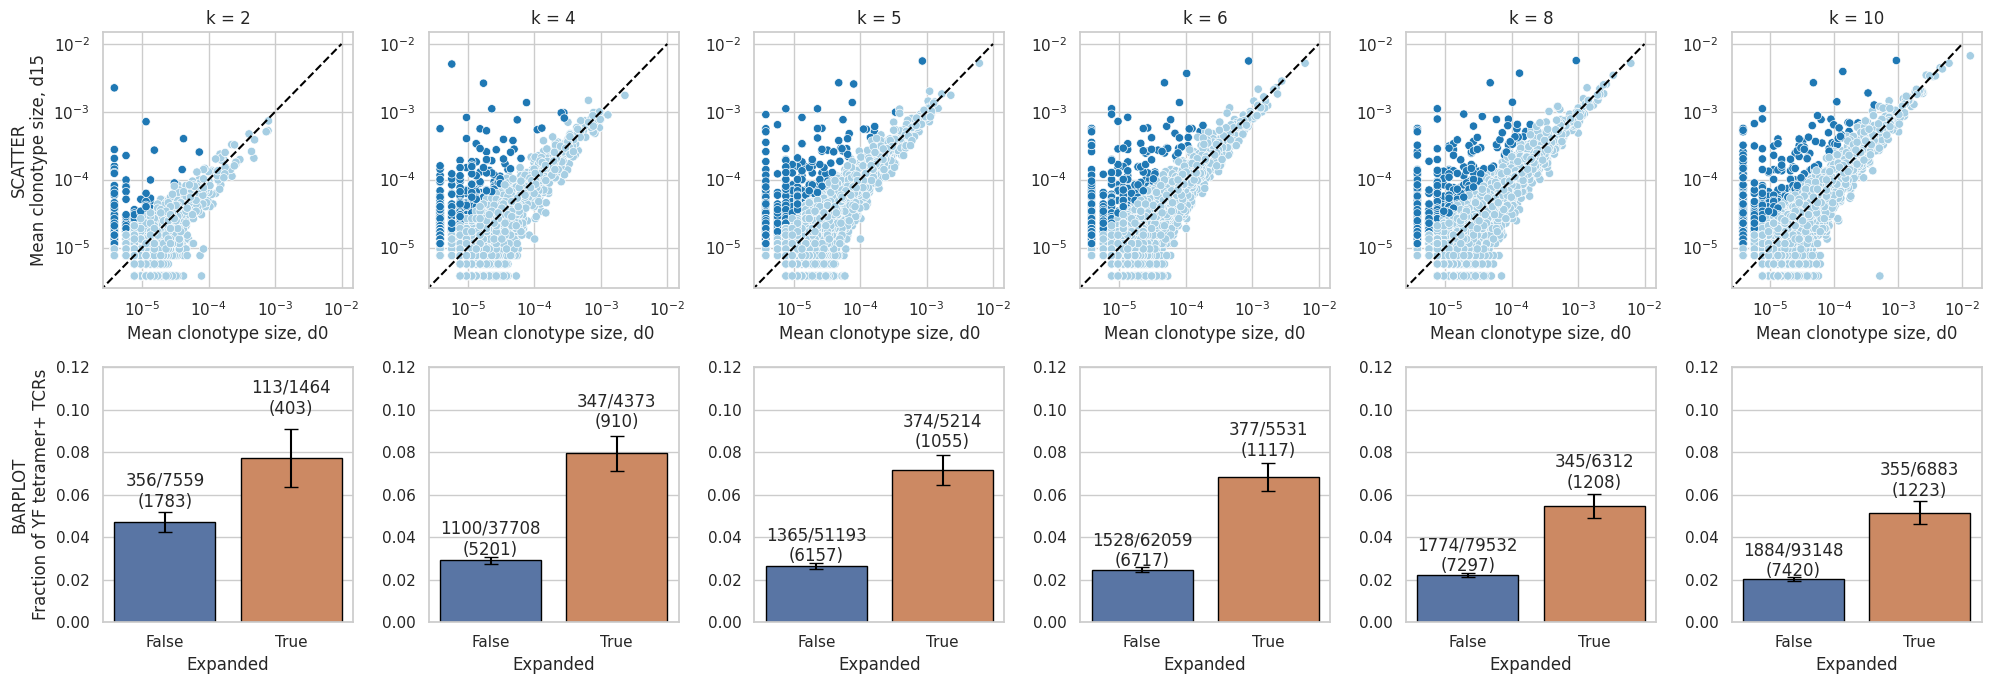

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

files = {
    2: "tcremp_clusters_summary_2.csv",
    4: "tcremp_clusters_summary_4.csv",
    5: "tcremp_clusters_summary_5.csv",
    6: "tcremp_clusters_summary_6.csv",
    8: "tcremp_clusters_summary_8.csv",
    10: "tcremp_clusters_summary_10.csv"
}

sns.set(style="whitegrid")

params_sorted = sorted(files.keys())
n = len(params_sorted)
fig, axes = plt.subplots(2, n, figsize=(20, 7))

for col, param in enumerate(params_sorted):
    filename = files[param]
    if not os.path.exists(filename):
        print(f"Warning: {filename} not found, skipping.")
        continue

    print(f"Processing {filename}...")

    data = pd.read_csv(filename)

    data_s = (
        data.groupby("cluster")
        .agg(
            total=("vdjdb_yfv", "count"),
            yf_count=("vdjdb_yfv", "sum"),
            freq0=("day0_usage", "sum"),
            freq15=("day15_usage", "sum")
        )
        .reset_index()
    )

    data_s["fc_log2"] = np.log2((data_s["freq15"]) / (data_s["freq0"]))
    data_s["expanded"] = data_s["fc_log2"] > 1.5
    data_s["mean_d0"] = data_s["freq0"] / data_s["total"]
    data_s["mean_d15"] = data_s["freq15"] / data_s["total"]

    ax1 = axes[0, col]
    sns.scatterplot(
        data=data_s,
        x="mean_d0",
        y="mean_d15",
        hue="expanded",
        palette="Paired",
        ax=ax1,
        legend=False
    )
    ax1.plot([0, 0.01], [0, 0.01], linestyle="--", color="black")
    ax1.set(xscale="log", yscale="log")
    ax1.set_title(f"k = {param}")
    ax1.set_xlabel("Mean clonotype size, d0")
    if col == 0:
        ax1.set_ylabel("Mean clonotype size, d15")
    else:
        ax1.set_ylabel("")

    ax2 = axes[1, col]

    data['expanded'] = np.log2((data["day15_usage"]) / (data["day0_usage"])) > 1.5
    data_s1 = (
        data.assign(expanded_cluster=data["expanded"])
        .groupby("expanded_cluster")
        .agg(
            total=("cluster_size", "sum"),
            yf_count=("vdjdb_yfv", "sum"),
            clusters=("cluster", "nunique")
        )
        .reindex([False, True], fill_value=0)
        .reset_index()
    )

    data_s1["yf_frac"] = data_s1["yf_count"] / data_s1["total"]
    data_s1["yf_frac_sd"] = np.sqrt(data_s1["yf_frac"] * (1 - data_s1["yf_frac"]) / data_s1["total"])
    
    sns.barplot(
        data=data_s1,
        x="expanded_cluster",
        y="yf_frac",
        hue="expanded_cluster",
        dodge=False,
        edgecolor="black",
        ax=ax2
    )
    ax2.errorbar(
        x=[0, 1],
        y=data_s1["yf_frac"].fillna(0),
        yerr=1.96 * data_s1["yf_frac_sd"],
        fmt="none",
        c="black",
        capsize=5
    )
    for j, row in data_s1.iterrows():
        print(j, row)
        label = f"{int(row['yf_count'])}/{int(row['total'])}\n({int(row['clusters'])})"
        ax2.text(
            j,
            row["yf_frac"] + 3 * row['yf_frac_sd'],
            label,
            ha="center"
        )
    ax2.set_xlabel("Expanded")
    if col == 0:
        ax2.set_ylabel("Fraction of YF tetramer+ TCRs")
    else:
        ax2.set_ylabel("")
    ax2.set_ylim(0, 0.12)
    ax2.get_legend().remove()

axes[0, 0].annotate("SCATTER", xy=(-0.3, 0.5), xycoords='axes fraction',
                    ha='right', va='center', fontsize=12, rotation=90)
axes[1, 0].annotate("BARPLOT", xy=(-0.3, 0.5), xycoords='axes fraction',
                    ha='right', va='center', fontsize=12, rotation=90)

plt.tight_layout()
plt.savefig("tcremp_combined_panel_final.png", dpi=300)
plt.show()
